In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [93]:
dataset = pd.read_csv('datasets/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [99]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


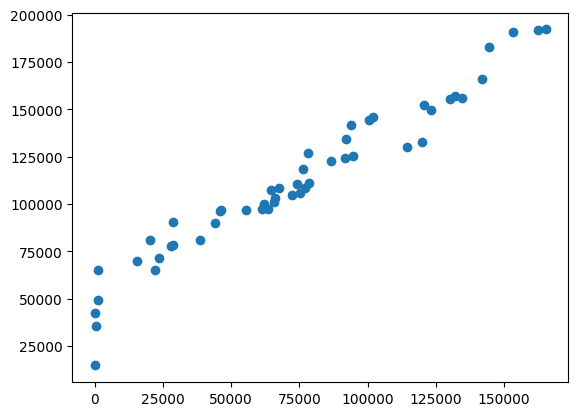

In [98]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'])
plt.xlabel(dataset.columns[0])

In [101]:
dataset.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'], dtype=object)

In [83]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])],remainder='passthrough') 
X = np.array(ct.fit_transform(X))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [85]:
X_train

array([[1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [0.0, 0.0, 1.0, 78389.47, 153773.43, 299737.29],
       [0.0, 1.0, 0.0, 28663.76, 127056.21, 201126.82],
       [0.0, 0.0, 1.0, 86419.7, 153514.11, 0.0],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1.0, 0.0, 0.0, 0.0, 116983.8, 45173.06],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 77044.01, 99281.34, 140574.81],
       [0.0, 1.0, 0.0, 67532.53, 105751.03, 304768.73],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1

In [86]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
# np.concatenate((y_pred, y_test), 0)

array([[114664.42, 105008.31],
       [ 90593.16,  96479.51],
       [ 75692.84,  78239.91],
       [ 70221.89,  81229.06],
       [179790.26, 191050.39],
       [171576.92, 182901.99],
       [ 49753.59,  35673.41],
       [102276.66, 101004.64],
       [ 58649.38,  49490.75],
       [ 98272.03,  97483.56]])